spatial step 0.011606784589343416


Text(0, 0.5, 't [s]')

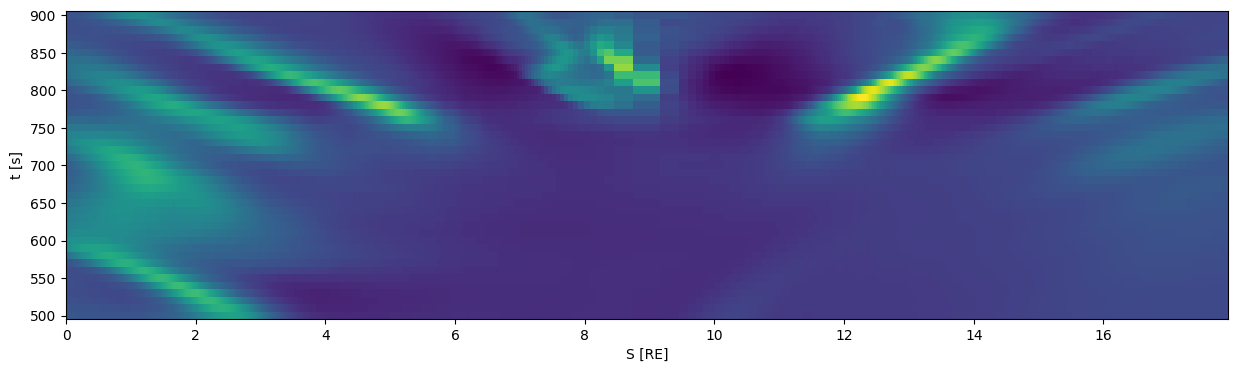

In [109]:
import numpy as np
import matplotlib.pyplot as plt

path='/../Users/ivanzait/Downloads/ballooning/'
RE=6371000

file='vx_timeseries.npy'
vx = np.load(path + file)

file='times.npy'
t = np.load(path + file)

file='distance.npy'
d = np.load(path + file)

delta_d=d[12]-d[11]
print('spatial step',delta_d)

# for kk in range(s.shape[0]-1):
#     d=np.sqrt( (s[kk+1,0]-s[kk,0])**2+(s[kk+1,1]-s[kk,1])**2)  
#l=np.linspace(0,len(d),len(d))
#l=np.linspace(0,s.shape[0],s.shape[0])*d/RE

fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(111)
ax1.pcolor(d,t,vx)
ax1.set_xlabel('S [RE]')
ax1.set_ylabel('t [s]')



114152414.73907483
gamma 0.045775940035507515
gamma 0.10498236540556745
gamma 0.0748151264597953


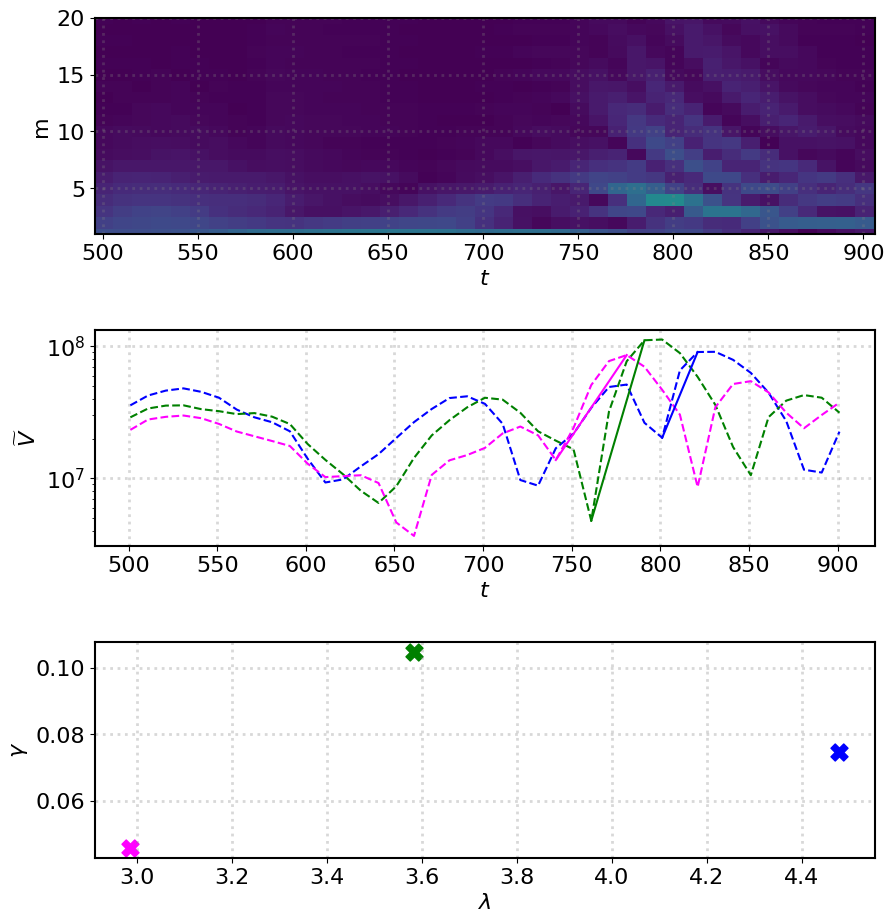

In [110]:
from numpy.fft import fft
def run_fft_1d(stack_tx):    
    fft_store= np.zeros_like(stack_tx)    
    for tt in range(0,stack_tx.shape[0]):
        profile=stack_tx[tt,:]
        fft_for_profile=abs(fft(profile))
        fft_store[tt,:]=fft_for_profile                
    return fft_store.T

def plot_get_slope(ax,fft_store,mode,t_start,t_end,color):
    cadence=10
    gamma=np.log(fft_store[mode,t_end]/fft_store[mode,t_start])/(t_end*cadence-t_start*cadence)
    print('gamma',gamma)
    t_for_exp=np.linspace(0,cadence*(t_end-t_start),10)
    exp_growth=np.exp(gamma*t_for_exp)
    ax.plot(501+(t_start)*10+t_for_exp,fft_store[mode,t_start]*exp_growth,color=color,linestyle="solid")
    return gamma

def get_k(lim1,lim2,n_prof):
    RE=6371000
    delta_x=((lim2-lim1)*RE)/n_prof
    #length_x = (lim2-lim1)*RE
    #n_prof=int(length_x/delta_x)    
    k_numbers=np.arange(1,n_prof)
    prof_in_m=delta_x*n_prof
    print(prof_in_m)
    lambdas=prof_in_m/k_numbers
    k_values=2*np.pi/lambdas
    return k_values

def ax_setting(ax,grid=True):
    ax.tick_params(axis='both', labelsize=16)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    if grid == True:
        ax.grid(axis="both", color="gray", alpha=.3, linewidth=2, linestyle=":")
    else:
        pass

    return ax


fft_spectra=run_fft_1d(vx)
m=np.linspace(0,fft_spectra.shape[0],fft_spectra.shape[0])

k_m=get_k(0,d[-1]-d[0],len(d))
wavelength=2*np.pi/(k_m)


fig=plt.figure(figsize=(12,12))
left_margin,height,width,vert_spacing=0.1, 0.18, 0.65, 0.08 ### Subplot sizes
ax1=fig.add_axes([left_margin, 1-1*(height+vert_spacing), width, height]) #### creating axis for modes
ax2=fig.add_axes([left_margin, 1-2*(height+vert_spacing), width, height]) #### creating axis for dispersion relation
ax3=fig.add_axes([left_margin, 1-3*(height+vert_spacing), width, height]) #### creating axis for dispersion relation

###### plot spectrum
ax1.pcolor(t,m,fft_spectra)
ax1.set_ylim([1,20])
ax1.set_ylabel('m'),ax1.set_xlabel('$t$')


###### plot modes
# ax2.plot(fft_spectra[1,:],color='black',linestyle='dashed')
# ax2.plot(t,fft_spectra[2,:],color='red',linestyle='dashed')
ax2.plot(t,fft_spectra[3,:],color='blue',linestyle='dashed')
ax2.plot(t,fft_spectra[4,:],color='green',linestyle='dashed')
ax2.plot(t,fft_spectra[5,:],color='magenta',linestyle='dashed')
#ax2.plot(fft_spectra[6,:],color='yellow',linestyle='dashed')

gamma_5=plot_get_slope(ax2,fft_store=fft_spectra,mode=5,t_start=24,t_end=28,color='magenta')
gamma_4=plot_get_slope(ax2,fft_store=fft_spectra,mode=4,t_start=26,t_end=29,color='green')
gamma_3=plot_get_slope(ax2,fft_store=fft_spectra,mode=3,t_start=30,t_end=32,color='blue')

ax2.set_yscale('log')
ax2.set_ylabel(r'$\widetilde{V}$'),ax2.set_xlabel('$t$')


###### plot growth rate
ax3.scatter(wavelength[3]/RE,gamma_3,marker='X',color='blue',s=150)
ax3.scatter(wavelength[4]/RE,gamma_4,marker='X',color='green',s=150)
ax3.scatter(wavelength[5]/RE,gamma_5,marker='X',color='magenta',s=150)
ax3.set_ylabel('$\gamma$'),ax3.set_xlabel('$\lambda$')



ax1=ax_setting(ax1,grid=True)
ax2=ax_setting(ax2,grid=True)
ax3=ax_setting(ax3,grid=True)

